In [168]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.gridspec import GridSpec
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import np_utils
import tensorflow as tf 
from sklearn.neural_network import MLPClassifier 
from scipy import interp
from itertools import cycle
import tensorflow
from tensorflow.keras.utils import to_categorical

In [169]:
# loading combined datasets of bots, coomecial, regular, trolls users
df_bots = pd.read_csv('merged_bots.csv', encoding = "unicode_escape")
df_commercial = pd.read_csv('merged_commercial_users.csv', encoding = "unicode_escape")
df_regular = pd.read_csv('merged_regular_users.csv', encoding = "unicode_escape")
df_trolls = pd.read_csv('merged_trolls.csv', encoding = "unicode_escape")

In [170]:
# concatinating all the datasets
df_merged = pd.concat([df_bots, df_commercial, df_regular, df_trolls])

In [171]:
df_merged.head()     # displaying first 5 rows

,id_no,user_screen_name,user_involved_in_conv,geo_enabled,user_verified,followers_count > friends_count,fav_&_retweet_are_identical,regularity_in_tweeting,sentiment_of_tweets,users
0,1,all_out_of_bots,False,False,False,1,0,0.220557,neutral,Bot
1,2,American__Voter,False,False,False,1,1,0.182258,positive,Bot
2,3,anastasia_bots,False,False,False,1,1,0.031176,positive,Bot
3,4,au_idea_bot,False,False,False,1,1,0.062619,neutral,Bot
4,5,BestOfTheBots,False,False,False,1,0,0.126083,neutral,Bot


In [172]:
df = df_merged.dropna(axis=1,how='all')  # dropping if any nan values present

In [173]:
# assigning '0' if regularity score is less than 0.1 else 1 
df['regularity_in_tweeting'] = df['regularity_in_tweeting'].apply(lambda x: 0 if x < 0.1 else 1)

Text(30.25, 0.5, 'Users_count')

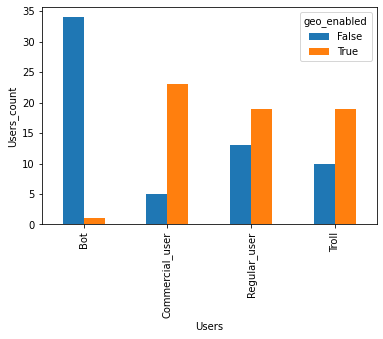

In [174]:
# visualizing number of users geo enabled
pd.crosstab(df['users'],df['geo_enabled']).plot.bar()
plt.savefig("users_geo_enabled.pdf")
plt.xlabel("Users")
plt.ylabel("Users_count")

Text(30.25, 0.5, 'users_count')

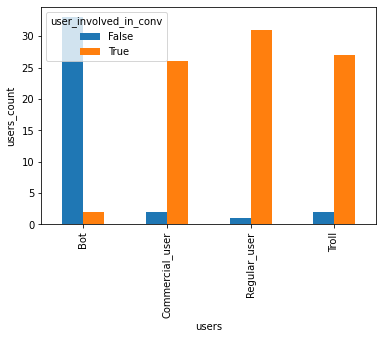

In [175]:
# visualizing number of users involved in a conversation
pd.crosstab(df['users'],df['user_involved_in_conv']).plot.bar()
plt.savefig("users_conv.pdf")
plt.xlabel("users")
plt.ylabel("users_count")

Text(30.25, 0.5, 'users_count')

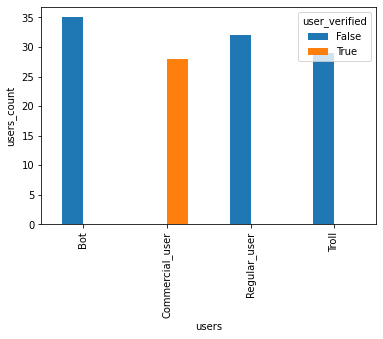

In [176]:
# visualizing number of users verified
pd.crosstab(df['users'],df['user_verified']).plot.bar()
plt.savefig("users_verified.pdf")
plt.xlabel("users")
plt.ylabel("users_count")

In [177]:
df.dtypes    # checking the data types present in the dataset

id_no                               int64
user_screen_name                   object
user_involved_in_conv                bool
geo_enabled                          bool
user_verified                        bool
followers_count > friends_count     int64
fav_&_retweet_are_identical         int64
regularity_in_tweeting              int64
sentiment_of_tweets                object
users                              object
dtype: object

In [178]:
# coverting boolean values to int
boolean_df = df.select_dtypes(include=['bool']).copy()
boolean_df = boolean_df.astype(int)

In [179]:
# attributes encoding of object, float data types
obj_df= df.select_dtypes(include=['object']).copy()
int_df = df.select_dtypes(include=['int64']).copy()
float_df = df.select_dtypes(include=['float64']).copy()

In [180]:
# concatinating all the encoded attributes
df1 = pd.concat([float_df, int_df], axis=1)
df1 = df1.reindex(int_df.index)
df2 = pd.concat([boolean_df, obj_df, int_df], axis=1)
df2 = df2.reindex(int_df.index)
print(df2)

    user_involved_in_conv  geo_enabled  user_verified user_screen_name  \
0                       0            0              0  all_out_of_bots   
1                       0            0              0  American__Voter   
2                       0            0              0   anastasia_bots   
3                       0            0              0      au_idea_bot   
4                       0            0              0    BestOfTheBots   
..                    ...          ...            ...              ...   
24                      1            1              0        Satabir66   
25                      1            1              0   sisterluketssf   
26                      1            1              0    SpencerwithaC   
27                      1            1              0     TheCodeTroll   
28                      1            1              0       ThePureGal   

   sentiment_of_tweets  users  id_no  followers_count > friends_count  \
0              neutral    Bot      1  

Text(30.25, 0.5, 'users_count')

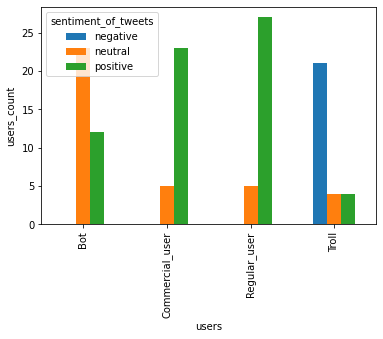

In [181]:
# visualizing sentiment of the tweets
pd.crosstab(df['users'],df['sentiment_of_tweets']).plot.bar()
plt.savefig("users_sentiment.pdf")
plt.xlabel("users")
plt.ylabel("users_count")

In [182]:
ordinal_encoding = OrdinalEncoder()
df2["users"] = ordinal_encoding.fit_transform(df2[["users"]])
df2["sentiment_of_tweets"] = ordinal_encoding.fit_transform(df2[["sentiment_of_tweets"]])

In [183]:
df2["users"] = df2.users.astype(int)
target = df2['users']     # assigning users as target

In [184]:
# droping labels, id_no, screen_name, etc for clustering
dataframe = df2.drop([ 'user_screen_name', 'id_no', 'users'], axis = 'columns') 

In [185]:
dataframe.head() 

,user_involved_in_conv,geo_enabled,user_verified,sentiment_of_tweets,followers_count > friends_count,fav_&_retweet_are_identical,regularity_in_tweeting
0,0,0,0,1.0,1,0,1
1,0,0,0,2.0,1,1,1
2,0,0,0,2.0,1,1,0
3,0,0,0,1.0,1,1,0
4,0,0,0,1.0,1,0,1


In [ ]:
#### CLUSTERING

In [186]:
# normalizing the data
scaler = StandardScaler()   # craeting an abjective of standard scaler
scaler.fit(dataframe)       # fitting the data to standard scaler
X_scale = scaler.transform(dataframe)     # gtransforming data to normalized from
df_scale = pd.DataFrame(X_scale)          # creating dataframe of scaled data
df_scale.head()

,0,1,2,3,4,5,6
0,-1.50438,-1.0,-0.540062,-0.480713,0.767948,-0.781274,0.540062
1,-1.50438,-1.0,-0.540062,0.843919,0.767948,1.279960,0.540062
2,-1.50438,-1.0,-0.540062,0.843919,0.767948,1.279960,-1.851640
3,-1.50438,-1.0,-0.540062,-0.480713,0.767948,1.279960,-1.851640
4,-1.50438,-1.0,-0.540062,-0.480713,0.767948,-0.781274,0.540062


In [187]:
# assigning parameters for t-sne algorithm and converting to 2D
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)  
tsne_scale_results = tsne.fit_transform(df_scale)    # training tsne algorithm

[t-SNE] Computing 123 nearest neighbors...
[t-SNE] Indexed 124 samples in 0.000s...
[t-SNE] Computed neighbors for 124 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 124 / 124
[t-SNE] Mean sigma: 2.589813
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.394096
[t-SNE] KL divergence after 1950 iterations: 0.021875


In [188]:
# creating dataframe of converted 2d data from tsne algorithm
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])

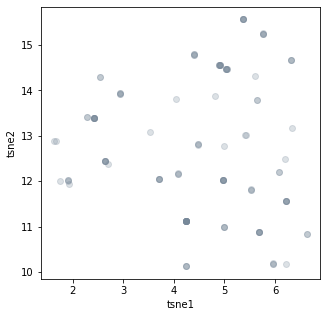

<Figure size 432x288 with 0 Axes>

In [189]:
# plotting 2D data 
plt.figure(figsize = (5,5))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()
plt.savefig("ktsne.pdf")

C:\new_anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

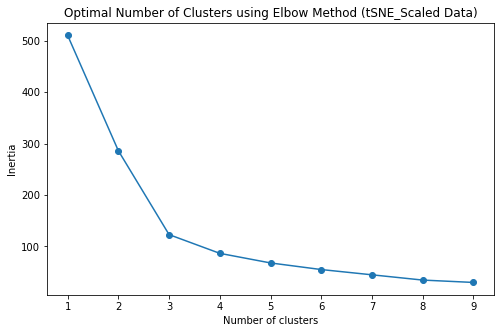

In [190]:
# plotting elbow curve to check the optimal number of curves
sse = []
k_list = range(1, 10)    # k vale should be eqaul to the number of faetures in the dataset
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
tsne_results_scale = pd.DataFrame({'Cluster': range(1,10), 'SSE': sse})
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [191]:
# creating an objective of kmeans algorithm with parameters
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)

In [192]:
# silhouettw score to check how close the datapoints in the clusters 
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))

KMeans tSNE Scaled Silhouette Score: 0.5285091996192932


In [193]:
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

C:\new_anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


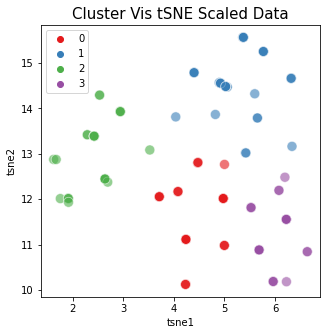

<Figure size 432x288 with 0 Axes>

In [194]:
# plotting kmeans clusters of the 2D data obtained from tsne
plt.figure(figsize = (5,5))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()
plt.savefig("kmeasclustering.pdf")

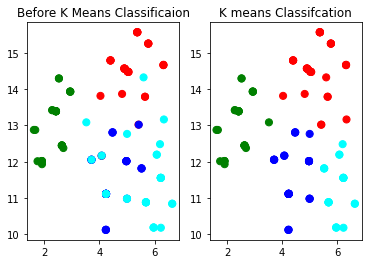

In [195]:
# classification of kmeans clusters to check how well they are clustering
tsne_scale_labels = np.choose(labels_tsne_scale,[2,0,1,3]).astype(np.int64)    # converting labels created from tsne to array
colors = np.array(["Red","Green","Blue", "cyan"])       # assigning colors to different clusters
plt.subplot(1,2,1) 
plt.scatter(tsne_df_scale['tsne1'], tsne_df_scale['tsne2'], c = colors[target],s=50) 
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(tsne_df_scale['tsne1'], tsne_df_scale['tsne2'], c = colors[tsne_scale_labels],s=50)
plt.title("K means Classifcation")
plt.savefig("kmeans.pdf")

In [196]:
# classification report
print(classification_report(target,tsne_scale_labels))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.97      1.00      0.98        28
           2       0.78      0.88      0.82        32
           3       0.86      0.66      0.75        29

    accuracy                           0.88       124
   macro avg       0.88      0.88      0.87       124
weighted avg       0.88      0.88      0.88       124



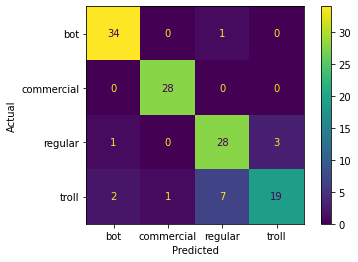

In [197]:
# visulaizing confusion matrix
cm = confusion_matrix(target,tsne_scale_labels)
cm
cm = confusion_matrix(target,tsne_scale_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=['bot','commercial', 'regular', 'troll'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
plt.savefig("clu.pdf")

In [198]:
# finding the correlation between the attributes 
pearsoncorr = df2.corr(method='pearson').round(decimals=2)
pearsoncorr

,user_involved_in_conv,geo_enabled,user_verified,sentiment_of_tweets,users,id_no,followers_count > friends_count,fav_&_retweet_are_identical,regularity_in_tweeting
user_involved_in_conv,1.00,0.56,0.28,0.04,0.69,0.01,-0.40,-0.56,0.14
geo_enabled,0.56,1.00,0.35,0.10,0.41,0.02,-0.13,-0.32,0.04
user_verified,0.28,0.35,1.00,0.33,-0.21,-0.10,0.41,0.25,-0.03
sentiment_of_tweets,0.04,0.10,0.33,1.00,-0.37,0.03,0.15,0.17,0.08
users,0.69,0.41,-0.21,-0.37,1.00,-0.09,-0.60,-0.66,0.16
id_no,0.01,0.02,-0.10,0.03,-0.09,1.00,0.07,0.11,-0.12
followers_count > friends_count,-0.40,-0.13,0.41,0.15,-0.60,0.07,1.00,0.57,-0.10
fav_&_retweet_are_identical,-0.56,-0.32,0.25,0.17,-0.66,0.11,0.57,1.00,-0.02
regularity_in_tweeting,0.14,0.04,-0.03,0.08,0.16,-0.12,-0.10,-0.02,1.00


<AxesSubplot:>

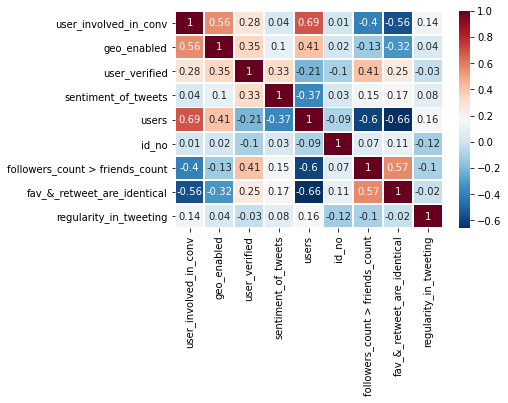

In [199]:
# plotting the pearson correlation heatmap of the fetures
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1.0)

In [ ]:
#### CLASSIFICATION AND EVALUATION

In [200]:
dataframe = df2.drop(['id_no', 'user_screen_name'], axis=1)

In [201]:
# data shuffling before building classifiers
dataframe = dataframe.sample(frac =1)

In [202]:
dataframe.head()

,user_involved_in_conv,geo_enabled,user_verified,sentiment_of_tweets,users,followers_count > friends_count,fav_&_retweet_are_identical,regularity_in_tweeting
19,0,0,0,2.0,0,1,1,1
29,0,0,0,2.0,0,1,1,0
4,0,1,1,2.0,1,1,1,1
26,1,1,1,2.0,1,1,1,1
20,0,0,0,1.0,0,1,1,1


In [203]:
# splitting data into train and test
train, test = train_test_split(dataframe, test_size = 0.25)

In [204]:
print(train.shape)
print(test.shape)

(93, 8)
(31, 8)


In [205]:
# assigning training features 
train_X = train[['user_involved_in_conv','geo_enabled','user_verified','sentiment_of_tweets',
                 'followers_count > friends_count','fav_&_retweet_are_identical', 'regularity_in_tweeting']]

In [206]:
# assigning training target
train_y=train.users

In [207]:
# assigning testing features
test_X= test[['user_involved_in_conv','geo_enabled','user_verified','sentiment_of_tweets',
                 'followers_count > friends_count','fav_&_retweet_are_identical', 'regularity_in_tweeting']]

In [208]:
# assigning testing target
test_y =test.users

In [209]:
train_X.head(5)

,user_involved_in_conv,geo_enabled,user_verified,sentiment_of_tweets,followers_count > friends_count,fav_&_retweet_are_identical,regularity_in_tweeting
23,1,1,0,2.0,0,0,1
33,0,0,0,2.0,1,1,1
19,1,1,1,1.0,1,1,0
6,1,0,0,2.0,0,0,1
17,1,1,0,0.0,1,0,1


In [210]:
# splitting the data into 10 folds for kfold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [211]:
# creating an objective of svm classifier
model = svm.SVC()
model.fit(train_X,train_y)        #traing the model
svm_prediction=model.predict(test_X)   # testig the model
print('Accuracy:', accuracy_score(test_y, svm_prediction))
print('F1 score:', f1_score(test_y, svm_prediction, average='macro'))    # macro or micro can be used for multiclass clallasifiaction
print('Recall:', recall_score(test_y, svm_prediction,average='macro'))
print('Precision:', precision_score(test_y, svm_prediction, average='macro'))
print('\n clasification report:\n', classification_report(test_y, svm_prediction))
print('\n confussion matrix:\n',confusion_matrix(test_y, svm_prediction))

Accuracy: 0.8387096774193549
F1 score: 0.8394607843137255
Recall: 0.8722222222222222
Precision: 0.875

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         7
           2       0.50      1.00      0.67         5
           3       1.00      0.60      0.75        10

    accuracy                           0.84        31
   macro avg       0.88      0.87      0.84        31
weighted avg       0.92      0.84      0.85        31


 confussion matrix:
 [[8 0 1 0]
 [0 7 0 0]
 [0 0 5 0]
 [0 0 4 6]]


Accuracy: 0.914 (0.080)


Text(33.0, 0.5, 'True')

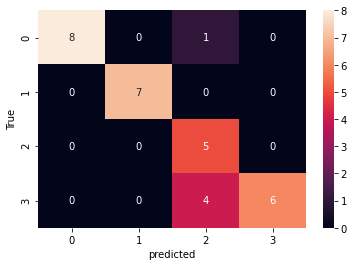

In [212]:
# accuracy after 10 fold cross validation for svm model
scores1 = cross_val_score(model, train_X , train_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))
sns.heatmap(confusion_matrix(test_y, svm_prediction), annot = True)
plt.savefig("svm.pdf")
plt.xlabel("predicted")
plt.ylabel("True")

In [213]:
# craeting an objective of logistic regression
model = LogisticRegression()
model.fit(train_X,train_y)              # model training
lr_prediction=model.predict(test_X)     # model testing
print('Accuracy:', accuracy_score(test_y, lr_prediction))
print('F1 score:', f1_score(test_y, lr_prediction, average='macro'))
print('Recall:', recall_score(test_y, lr_prediction,average='macro'))
print('Precision:', precision_score(test_y, lr_prediction, average='macro'))
print('\n clasification report:\n', classification_report(test_y, lr_prediction))
print('\n confussion matrix:\n',confusion_matrix(test_y, lr_prediction))

Accuracy: 0.8709677419354839
F1 score: 0.8697478991596639
Recall: 0.8972222222222221
Precision: 0.8888888888888888

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         7
           2       0.56      1.00      0.71         5
           3       1.00      0.70      0.82        10

    accuracy                           0.87        31
   macro avg       0.89      0.90      0.87        31
weighted avg       0.93      0.87      0.88        31


 confussion matrix:
 [[8 0 1 0]
 [0 7 0 0]
 [0 0 5 0]
 [0 0 3 7]]


Accuracy: 0.904 (0.087)


Text(33.0, 0.5, 'True')

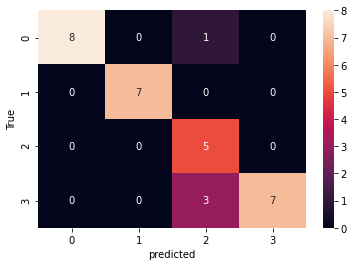

In [214]:
# accuracy after kfold cross validation for logistic regression
scores = cross_val_score(model, train_X , train_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
sns.heatmap(confusion_matrix(test_y, lr_prediction), annot = True)
plt.savefig("lr.pdf")
plt.xlabel("predicted")
plt.ylabel("True")

In [215]:
# craeting an objective of decison tree classifier
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
dt_prediction=model.predict(test_X)
print('Accuracy:', accuracy_score(test_y, dt_prediction))
print('F1 score:', f1_score(test_y, dt_prediction, average='macro'))
print('Recall:', recall_score(test_y, dt_prediction,average='macro'))
print('Precision:', precision_score(test_y, dt_prediction, average='macro'))
print('\n clasification report:\n', classification_report(test_y, dt_prediction))
print('\n confussion matrix:\n',confusion_matrix(test_y, dt_prediction))

Accuracy: 0.8387096774193549
F1 score: 0.8410005027652085
Recall: 0.8722222222222222
Precision: 0.8427579365079365

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       1.00      1.00      1.00         7
           2       0.62      1.00      0.77         5
           3       0.86      0.60      0.71        10

    accuracy                           0.84        31
   macro avg       0.84      0.87      0.84        31
weighted avg       0.86      0.84      0.84        31


 confussion matrix:
 [[8 0 0 1]
 [0 7 0 0]
 [0 0 5 0]
 [1 0 3 6]]


Accuracy: 0.893 (0.081)


Text(33.0, 0.5, 'True')

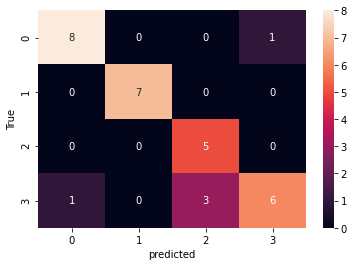

In [216]:
# accuracy after kfold cross validation for decision tree
scores1 = cross_val_score(model, train_X , train_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))
sns.heatmap(confusion_matrix(test_y, dt_prediction), annot = True)
plt.savefig("dt.pdf")
plt.xlabel("predicted")
plt.ylabel("True")

In [217]:
# craeting an objective of knn algorithm
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
knn_prediction=model.predict(test_X)
print('Accuracy:', accuracy_score(test_y, knn_prediction))
print('F1 score:', f1_score(test_y, knn_prediction, average='macro'))
print('Recall:', recall_score(test_y, knn_prediction,average='macro'))
print('Precision:', precision_score(test_y, knn_prediction, average='macro'))
print('\n clasification report:\n', classification_report(test_y, knn_prediction))
print('\n confussion matrix:\n',confusion_matrix(test_y, knn_prediction))

Accuracy: 0.8709677419354839
F1 score: 0.8697712418300654
Recall: 0.8972222222222221
Precision: 0.8695436507936508

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.88      1.00      0.93         7
           2       0.71      1.00      0.83         5
           3       1.00      0.70      0.82        10

    accuracy                           0.87        31
   macro avg       0.87      0.90      0.87        31
weighted avg       0.89      0.87      0.87        31


 confussion matrix:
 [[8 1 0 0]
 [0 7 0 0]
 [0 0 5 0]
 [1 0 2 7]]


Accuracy: 0.914 (0.080)


Text(33.0, 0.5, 'True')

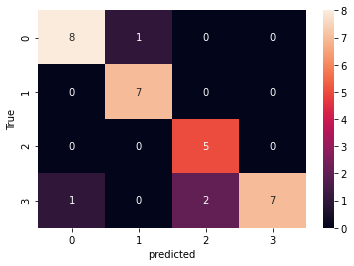

In [218]:
# accuracy after kfold cross validation
scores1 = cross_val_score(model, train_X , train_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))
sns.heatmap(confusion_matrix(test_y, knn_prediction), annot = True)
plt.savefig("knn.pdf")
plt.xlabel("predicted")
plt.ylabel("True")

In [219]:
# creating an objecive of random forest classifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(train_X,train_y)
rf_prediction=model.predict(test_X)
print('Accuracy:', accuracy_score(test_y, rf_prediction))
print('F1 score:', f1_score(test_y, rf_prediction, average='macro'))
print('Recall:', recall_score(test_y, rf_prediction,average='macro'))
print('Precision:', precision_score(test_y, rf_prediction, average='macro'))
print('\n clasification report:\n', classification_report(test_y, rf_prediction))
print('\n confussion matrix:\n',confusion_matrix(test_y, rf_prediction))

Accuracy: 0.8709677419354839
F1 score: 0.8660714285714286
Recall: 0.9
Precision: 0.8888888888888888

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       0.56      1.00      0.71         5
           3       1.00      0.60      0.75        10

    accuracy                           0.87        31
   macro avg       0.89      0.90      0.87        31
weighted avg       0.93      0.87      0.87        31


 confussion matrix:
 [[9 0 0 0]
 [0 7 0 0]
 [0 0 5 0]
 [0 0 4 6]]


Accuracy: 0.924 (0.083)


Text(33.0, 0.5, 'True')

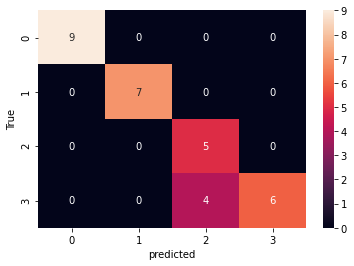

In [220]:
# accuracy aftre kfold cross validation
scores1 = cross_val_score(model, train_X , train_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))
sns.heatmap(confusion_matrix(test_y, rf_prediction), annot = True)
plt.savefig("rf.pdf")
plt.xlabel("predicted")
plt.ylabel("True")

In [ ]:
#### HYPER PARAMETERS TUNING

In [221]:
model = svm.SVC()                        # creating model objective 
grid = {'C': [0.1, 1, 10, 100, 1000],    # creating dictionary of all the hyperparameters   
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(estimator=model, param_grid=grid, cv=cv, refit = True, verbose = 3)     # creating objective of GridSearchCV model
grid.fit(train_X,train_y)  # training the model

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 6/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 7/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 8/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 9/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 10/10] END ...................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/10] END ..................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/10] END ..................C=0.1, gamma=0

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       1.00      1.00      1.00         7
           2       0.56      1.00      0.71         5
           3       1.00      0.60      0.75        10

    accuracy                           0.84        31
   macro avg       0.86      0.87      0.84        31
weighted avg       0.90      0.84      0.84        31



Text(33.0, 0.5, 'True')

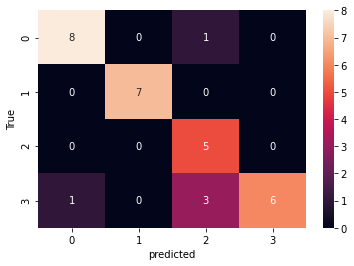

In [222]:
print(grid.best_params_)    # printing best parameters obtained from GridSerach CV 
print(grid.best_estimator_) # printing best estimators obtained from Gridsesrch CV
grid_predictions = grid.predict(test_X)    # testing the model based on the optimal parameters
print(classification_report(test_y, grid_predictions))
sns.heatmap(confusion_matrix(test_y, grid_predictions), annot = True)
plt.savefig("svmafterhyp.pdf")
plt.xlabel("predicted")
plt.ylabel("True")

In [223]:
model = LogisticRegression()   # creating model objective 
grid = {'penalty':['l2'],      # creating dictionary of hyper parameters 
        'C':[100, 10, 1.0, 0.1, 0.01]}
grid = GridSearchCV(estimator=model, cv=cv, param_grid=grid, refit = True, verbose = 3)
grid.fit(train_X,train_y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\new_anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\new_anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

[CV 1/10] END .............................C=100, penalty=l2; total time=   2.8s
[CV 2/10] END .............................C=100, penalty=l2; total time=   0.0s
[CV 3/10] END .............................C=100, penalty=l2; total time=   0.0s
[CV 4/10] END .............................C=100, penalty=l2; total time=   0.0s


C:\new_anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\new_anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

[CV 5/10] END .............................C=100, penalty=l2; total time=   0.0s
[CV 6/10] END .............................C=100, penalty=l2; total time=   0.0s


C:\new_anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\new_anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

[CV 7/10] END .............................C=100, penalty=l2; total time=   0.1s
[CV 8/10] END .............................C=100, penalty=l2; total time=   0.0s
[CV 9/10] END .............................C=100, penalty=l2; total time=   0.0s
[CV 10/10] END ............................C=100, penalty=l2; total time=   0.0s
[CV 1/10] END ..............................C=10, penalty=l2; total time=   0.0s
[CV 2/10] END ..............................C=10, penalty=l2; total time=   0.0s
[CV 3/10] END ..............................C=10, penalty=l2; total time=   0.0s
[CV 4/10] END ..............................C=10, penalty=l2; total time=   0.0s
[CV 5/10] END ..............................C=10, penalty=l2; total time=   0.0s
[CV 6/10] END ..............................C=10, penalty=l2; total time=   0.0s
[CV 7/10] END ..............................C=10, penalty=l2; total time=   0.0s
[CV 8/10] END ..............................C=10, penalty=l2; total time=   0.0s
[CV 9/10] END ..............

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2']},
             verbose=3)

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       0.56      1.00      0.71         5
           3       1.00      0.60      0.75        10

    accuracy                           0.87        31
   macro avg       0.89      0.90      0.87        31
weighted avg       0.93      0.87      0.87        31



Text(33.0, 0.5, 'True')

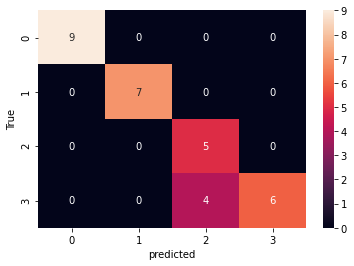

In [224]:
print(grid.best_params_)                 # printing best parameters obtained from GridSerach CV
print(grid.best_estimator_)               # printing best estimators obtained from GridSerach CV
grid_predictions = grid.predict(test_X)
print(classification_report(test_y, grid_predictions))
sns.heatmap(confusion_matrix(test_y, grid_predictions), annot = True)
plt.savefig("lrafterhyp.pdf")
plt.xlabel("predicted")
plt.ylabel("True")

In [225]:
model = KNeighborsClassifier()
grid = {'n_neighbors' : range(1, 21, 2),         #creating dictionary of hyper parameters of knn model
'weights':['uniform', 'distance'],
'metric':['euclidean', 'manhattan', 'minkowski']}
grid = GridSearchCV(estimator=model, param_grid=grid, cv =cv, refit = True, verbose = 3)
grid.fit(train_X,train_y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 7/10] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 8/10] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 9/10] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV 2/10] END metric=e

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             verbose=3)

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
KNeighborsClassifier(metric='euclidean', n_neighbors=11)
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.88      1.00      0.93         7
           2       0.71      1.00      0.83         5
           3       1.00      0.80      0.89        10

    accuracy                           0.90        31
   macro avg       0.90      0.92      0.90        31
weighted avg       0.93      0.90      0.91        31



Text(33.0, 0.5, 'True')

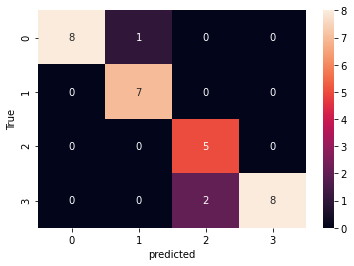

In [226]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(test_X)
print(classification_report(test_y, grid_predictions))
sns.heatmap(confusion_matrix(test_y, grid_predictions), annot = True)
plt.savefig("knnafterhyp.pdf")
plt.xlabel("predicted")
plt.ylabel("True")

In [227]:
model = RandomForestClassifier()
grid ={'n_estimators':[10, 100, 1000],         # creating dictionary of hyper parameters for random forest algorithm
'max_features' :['sqrt', 'log2']}
grid = GridSearchCV(estimator=model, param_grid=grid, cv =cv, refit = True, verbose = 3)
grid.fit(train_X,train_y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 2/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 3/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 4/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 5/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 6/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 7/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 8/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 9/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 10/10] END ...........max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 1/10] END ...........max_features=sqrt, n_estimators=100; total time=   0.1s
[CV 2/10] END ...........max_features=sqrt, n_es

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             verbose=3)

{'max_features': 'log2', 'n_estimators': 10}
RandomForestClassifier(max_features='log2', n_estimators=10)
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       1.00      1.00      1.00         7
           2       0.50      1.00      0.67         5
           3       1.00      0.50      0.67        10

    accuracy                           0.81        31
   macro avg       0.85      0.85      0.81        31
weighted avg       0.89      0.81      0.81        31



Text(33.0, 0.5, 'True')

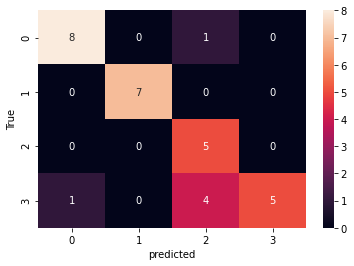

In [228]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(test_X)
print(classification_report(test_y, grid_predictions))
sns.heatmap(confusion_matrix(test_y, grid_predictions), annot = True)
plt.savefig("rfafterhyp.pdf")
plt.xlabel("predicted")
plt.ylabel("True")

In [229]:
model=DecisionTreeClassifier()
grid = { 'min_samples_split' : range(1,10),       # creating dictioary of hyper parameters for decison tree algorithm
        'min_samples_leaf':range(1,5),
        'criterion' :['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12]}
grid = GridSearchCV(estimator=model, param_grid=grid, cv =cv, refit = True, verbose = 3)
grid.fit(train_X,train_y)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 3/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, min_samples_leaf=2, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 2/10] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=3, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 8/10] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, min_samples_leaf=4, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, min_samples_leaf=1, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samp

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 9/10] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=3, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=4, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 10/10] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=1, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 1/10] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=6, min_samples_leaf=2, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=6, min_samples_leaf=3, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 10/10] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=4, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 2/10] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samp

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 6/10] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, min_samples_leaf=2, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 3/10] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, min_samples_leaf=3, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 1/10] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, min_samples_leaf=4, min_sampl

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 2/10] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=1

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 4/10] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, min_samples_leaf=2

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 2/10] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=3,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 7/10] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=4,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 4/10] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, min_samples_leaf=1,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=2,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 5/10] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, min_samples_leaf=3,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 1/10] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=4,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 8/10] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 8/10] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 9/10] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 2/10] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 9/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 8/10] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 1/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 10/10] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 1/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=6

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 7/10] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 5/10] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 10/10] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=6

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 6/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 5/10] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 1/10] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 6/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8,

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 7/10] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=entropy, max

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 10/10] END criterion=entropy, max

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 8/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 7/10] END criterion=entropy, max

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 9/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV 8/10] END criterion=entropy, ma

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 5/10] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV 4/10] END criterion=entropy, ma

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p


[CV 1/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV 10/10] END criterion=entropy, ma

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 4/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV 3/10] END criterion=entropy, max

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\new_anaconda\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\new_anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

[CV 9/10] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=1; total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 8/10] END criterion=entropy, max

C:\new_anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.77333333 0.77333333 0.77333333 0.77333333 0.77333333
 0.77333333 0.77333333 0.77333333        nan 0.77333333 0.77333333
 0.77333333 0.77333333 0.77333333 0.77333333 0.77333333 0.77333333
        nan 0.77333333 0.77333333 0.77333333 0.77333333 0.77333333
 0.77333333 0.77333333 0.77333333        nan 0.77333333 0.77333333
 0.77333333 0.77333333 0.77333333 0.77333333 0.77333333 0.77333333
        nan 0.92444444 0.92444444 0.92444444 0.92444444 0.92444444
 0.92444444 0.92444444 0.92444444        nan 0.92444444 0.92444444
 0.92444444 0.92444444 0.92444444 0.92444444 0.92444444 0.92444444
        nan 0.92444444 0.92444444 0.92444444 0.92444444 0.92444444
 0.92444444 0.92444444 0.92444444        nan 0.92444444 0.92444444
 0.92444444 0.92444444 0.92444444 0.92444444 0.92444444 0.92444444
        nan 0.90444444 0.90333333 0.90333333 0.90333333 0.9033

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=3)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         7
           2       0.56      1.00      0.71         5
           3       0.86      0.60      0.71        10

    accuracy                           0.84        31
   macro avg       0.85      0.87      0.84        31
weighted avg       0.88      0.84      0.84        31



Text(33.0, 0.5, 'True')

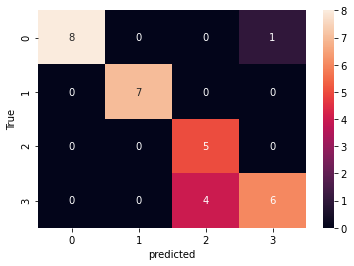

In [230]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(test_X)
print(classification_report(test_y, grid_predictions))
sns.heatmap(confusion_matrix(test_y, grid_predictions), annot = True)
plt.savefig("dtafterhyp.pdf")
plt.xlabel("predicted")
plt.ylabel("True")

In [ ]:
#### BUILDING ANN MODEL (MLP CLASSIFIER)

In [231]:
y= dataframe.users   # assigning target as y 

In [232]:
classes = y.unique()      # finding number of unique classes present in the data
classes

array([0, 1, 2, 3])

In [233]:
# one hot encoding of labels 
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = tensorflow.keras.utils.to_categorical(y)
print(y)
y.shape

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0.

(124, 4)

In [234]:
# standardizing the data before feeding to MLP classifier
X = dataframe.drop(['users'], axis =1)
Scaler=StandardScaler()
X=Scaler.fit_transform(X)
X[0:3]

array([[-1.50437957, -1.        , -0.54006172,  0.84391885,  0.76794765,
         1.27996011,  0.54006172],
       [-1.50437957, -1.        , -0.54006172,  0.84391885,  0.76794765,
         1.27996011, -1.8516402 ],
       [-1.50437957,  1.        ,  1.8516402 ,  0.84391885,  0.76794765,
         1.27996011,  0.54006172]])

In [235]:
X.shape   # checking the shape of the data

(124, 7)

In [236]:
# train, test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=0)

In [237]:
# creating an objective of Multi Layer perceptron classifier 
mlpc = MLPClassifier(random_state = 0)
mlpc.fit(X_train, y_train)  # training the MLP classifier 

C:\new_anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [238]:
y_pred = mlpc.predict(X_test)     # teating MLP classifier 
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("f1_score_weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='weighted'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='weighted'))

Accuracy: 0.8709677419354839
f1_score_weighted: 0.9096832237749046
Recall: 0.9354838709677419
Precision: 0.8930875576036865


In [239]:
# creating the dictionary of hyperparameters for MLP classifier
mlpc_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic", ]}
mlpc = MLPClassifier(random_state = 0)
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 10, n_jobs = -1,verbose = 2)
mlpc_cv_model.fit(X_train, y_train) 

Fitting 10 folds for each of 54 candidates, totalling 540 fits


C:\new_anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=0), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.0001],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [240]:
# printing the optimal hyper parameters for MLP classifier
print("The best parameters: " + str(mlpc_cv_model.best_params_))

The best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'lbfgs'}


In [241]:
# Setting the Final Model with the best parameter
mlpc_tuned = mlpc_cv_model.best_estimator_
mlpc_tuned.fit(X_train, y_train)            # Fitting Final Model

C:\new_anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10, 10),
              random_state=0, solver='lbfgs')

In [242]:
# K-fold f1_weighted
kf = KFold(shuffle=True, n_splits=10)
cv_results_kfold = cross_val_score(mlpc_tuned, X_test, np.argmax(y_test, axis=1), cv=kf, scoring= 'f1_weighted')
print("K-fold Cross Validation f1_weigted Results: ",cv_results_kfold)
print("K-fold Cross Validation f1_weigted Results Mean: ",cv_results_kfold.mean())

K-fold Cross Validation f1_weigted Results:  [1.         1.         1.         0.8        0.55555556 1.
 0.55555556 1.         1.         0.44444444]
K-fold Cross Validation f1_weigted Results Mean:  0.8355555555555556


In [243]:
# Tune Model Prediction
# Prediction process of Final Model over test set
y_pred = mlpc_tuned.predict(X_test)
# Accuracy and f1_weighted value of Final Model
print("f1_weighted:",metrics.f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),average='weighted'))
print("accuracy:",metrics.accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

f1_weighted: 0.9367529282639638
accuracy: 0.9354838709677419


In [244]:
# Classification Report
model_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(model_report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00         7
           2       0.80      1.00      0.89         8
           3       1.00      0.83      0.91         6

    accuracy                           0.94        31
   macro avg       0.95      0.93      0.94        31
weighted avg       0.95      0.94      0.94        31



[[9 0 1 0]
 [0 7 0 0]
 [0 0 8 0]
 [0 0 1 5]]


<AxesSubplot:>

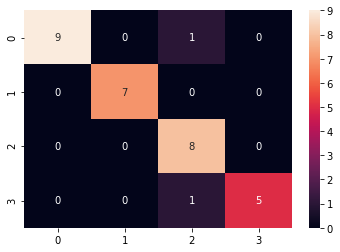

In [245]:
# Confusion Matrix
model_conf = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(model_conf)
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)), annot = True)

In [246]:
y_score = mlpc_tuned.predict_proba(X_test)
n_classes = 4
fpr = dict()  # computing ROC curve and ROC area for each class
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())  # compute micro-average ROC curve and ROC area
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2 # line_width

<Figure size 432x288 with 0 Axes>

In [247]:
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) # first aggregate all false positive rates

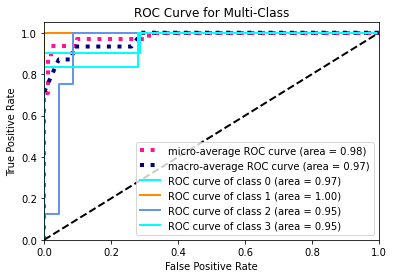

In [248]:
# Process of plotting roc-auc curve to all classes.
mean_tpr = np.zeros_like(all_fpr)   # then interpolate all ROC curves at this points
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes               # finally average it and compute AUC
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.figure()                        # Plot all ROC curves
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()